In [1]:
from mpmath import zeta
import numpy as np 
import sympy
import matplotlib.pyplot as plt 
import pyprimes
import seaborn as sns

In [2]:
# Developed Libraries
from Zeta_Algorithms import zetaStochastic, zetaNormRange

## <h1><center> NUMERICAL STUDY OF THE LARGE VALUES OF THE RIEMANN ZETA FUNCTION SUPERVISED BY PROF. L.P. ARGUIN </center></h1>

**Objectives The goal is to develop numerical methods to verify and extend conjectures about the large values of the Riemann zeta function in short intervals. The Riemann Zeta function is defined as:**

$$\zeta(s):=\sum_{n=1}^\infty{n^{-s}} \ \ \ \ : \ (s=\sigma + it) \ \ ; \ (\sigma > 1)$$

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### A model for large values of $log(\zeta)$

Our Zeta Stochastic Function is defined $(\ X_T(h),\  h\in I)$, with $I\in [-1,1]$
$$X_T(h) = \sum_{p\leq T}\cdot \frac{1}{\sqrt{p}}Re(p^{ih}e^{i\theta_p})$$
Where $p$ refers to the primes, $Re$ is concerned with the 'real' part of the expression $p^{ih}e^{i\theta_p}$ and $\theta_p \sim U(0,2\pi) \ IID$ and indexed by primes

Through Euler's method we have the following realization
$$X_T(h) = \sum_{p\leq T}\cdot \frac{1}{\sqrt{p}}cos(\theta_p - hlog(p))$$

In [26]:
# Stores prime list up to 10^8 (ideally should hold 10^50)
prime_num = np.array(list(pyprimes.primes_below(1e8)))

In [28]:
prime_num.size

5761455

In [ ]:
f = open("prime.txt", "w")
f.write("[")
for i in prime_num:
    f.write("{},".format(str(i)))
f.write("]")
f.close()

In [71]:
T_val = int(1e6)

# create range interval of h from -1 to 1 (points every 1/log(T))
x=np.arange(-1,1,1/np.round(np.log(T_val)))

In [72]:
x

array([-1.00000000e+00, -9.28571429e-01, -8.57142857e-01, -7.85714286e-01,
       -7.14285714e-01, -6.42857143e-01, -5.71428571e-01, -5.00000000e-01,
       -4.28571429e-01, -3.57142857e-01, -2.85714286e-01, -2.14285714e-01,
       -1.42857143e-01, -7.14285714e-02, -4.44089210e-16,  7.14285714e-02,
        1.42857143e-01,  2.14285714e-01,  2.85714286e-01,  3.57142857e-01,
        4.28571429e-01,  5.00000000e-01,  5.71428571e-01,  6.42857143e-01,
        7.14285714e-01,  7.85714286e-01,  8.57142857e-01,  9.28571429e-01])

In [73]:
# create stochastic zeta range over h interval  
sims = 10
y = np.array([[zetaStochastic(h=i, T=T_val, prime_list=prime_num) for i in x] for _ in range(sims)]).reshape(sims, x.size)

In [74]:
y

array([[-3.07193024e-01, -6.96360326e-01,  2.30781124e+00,
         2.37090733e+00,  6.54916076e-01, -9.44208853e-01,
        -5.31637262e-01, -6.18638520e-01, -2.77143889e+00,
        -2.12444913e+00,  1.58832690e+00,  4.74201160e-01,
         7.67009887e-02,  5.90664699e-02, -1.00327366e+00,
         2.27870956e+00, -7.14105985e-01, -1.67176948e+00,
         5.14481363e-01, -1.13172294e+00, -6.04972787e-02,
         1.25206797e+00,  6.78805030e-02,  1.00219045e+00,
         1.03804443e+00,  4.05864213e-01,  1.68803038e-02,
        -9.30686328e-01],
       [-3.07090822e-01, -6.37212281e-01, -1.97231577e+00,
         2.65264123e+00,  7.42821306e-01,  1.62557396e+00,
         1.62954811e+00, -9.81998538e-01,  5.48567159e-01,
         8.06483320e-01,  1.99430644e+00, -5.76728546e-01,
        -1.35855671e+00, -1.13871933e+00,  9.15754935e-01,
         3.24654265e-01,  1.03320474e+00, -2.13232913e+00,
         1.87561384e-01, -7.24128926e-02, -3.02522435e-01,
        -3.07473578e-01,  6.52

In [75]:
# rolling maximum of norm function
# maximum = [y[:, :i+1].max() for i in range(y.shape[1])]

# rolling minimum of norm function
# minimum = [y[:, :i+1].min() for i in range(y.shape[1])]

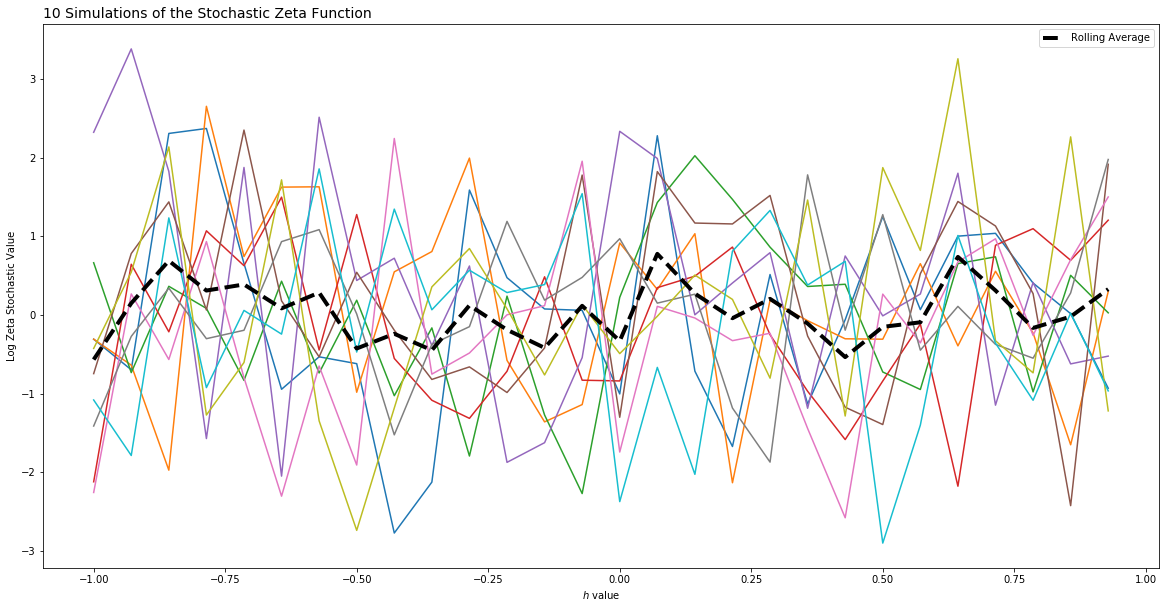

In [79]:
plt.figure(figsize=(20,10))  
plt.title("10 Simulations of the Stochastic Zeta Function", loc='left', size=14)
for i in y:
    plt.plot(x, i)
plt.plot(x, np.average(y, axis=0), lw=4, color='black', label='Rolling Average', ls='--')
# plt.plot(x, maximum, lw=2, color='red', ls='--', label='Rolling Maximum')
# plt.plot(x, minimum, lw=2, color='red', ls='--', label='Rolling Minimum')


plt.ylabel('Log Zeta Stochastic Value')
plt.xlabel('$h$ value')
plt.legend()
plt.show()

**Conjecture**

We assert that the maxium of the stochastic function should be defined as follows:
$$max_{|h|<1}X_t(h)\approx log(log(T)) - \frac{3}{4}log(log(log(T)))$$
Abbreviating the log expressions, we underscore each log with the number of succesive logs taken of the value $T$ below
$$max_{|h|<1}X_t(h)\approx log_2(T)) - \frac{3}{4}log_3(T)))$$

In [77]:
print("Our simulated maximum was   ", np.average(y.max(axis=1)))
print("Conjecture maximum should be", np.log(np.log(T_val)) - 0.75*np.log(np.log(np.log(T_val))))

Our simulated maximum was    2.3614333128683573
Conjecture maximum should be 1.901755015287042


In [54]:
# standard IID compariosn 
np.log(np.log(T_val)) - 0.25*np.log(np.log(np.log(T_val)))

2.3844462814130214

### Fyodorov-Hiary-Keating Conjecture

**Conjecture (Fyodorov-Hiary-Keating '12)'**

if $\tau\sim Unif(T,2T)$, then as $T \rightarrow \infty$
$$max_{|h|<1}|\zeta(1/2 + i(\tau +h))| = \frac{log(T)}{log(log(T))^{3/4}}$$
Using the same log convention discussed earlier we have 
$$max_{|h|<1}|\zeta(1/2 + i(\tau +h))| = \frac{log(T)}{log_2(T))^{3/4}}$$

In [63]:
N = 0   # starting value of T range 
deltaN = 500    # length of T range

In [64]:
# creating the interval range t
t_range=np.arange(N, N+deltaN)

In [65]:
# storage for the normal zeta 
norm_zeta_value = zetaNormRange(N, deltaN)

# rolling average of norm function 
average = np.cumsum(norm_zeta_value)/(t_range+1)

# rolling maximum of norm function
maximum = [norm_zeta_value[:i+1].max() for i in range(norm_zeta_value.size)]

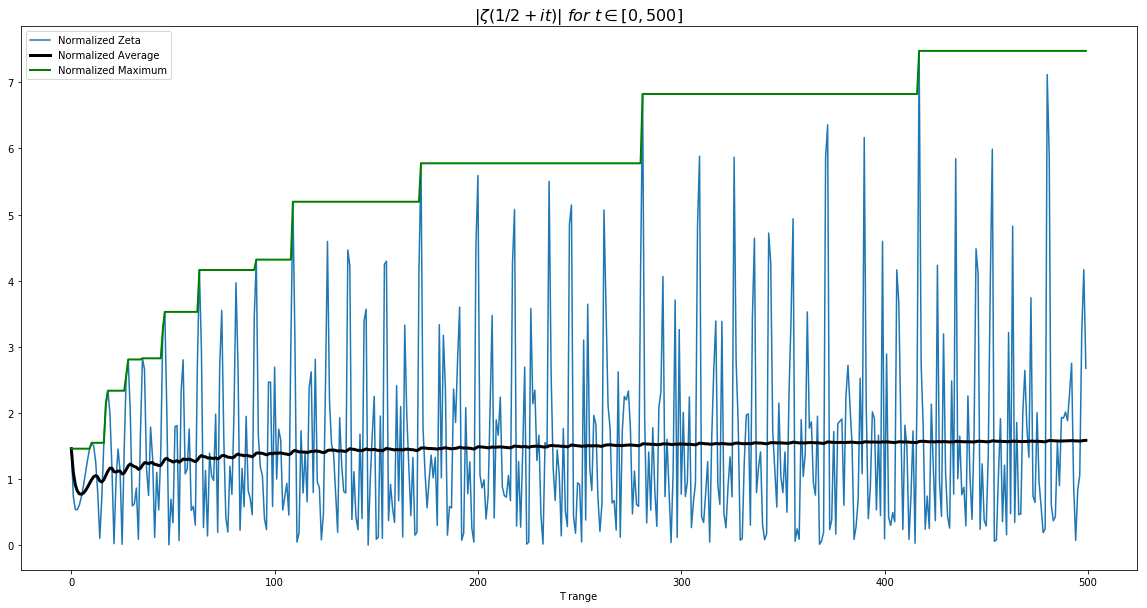

In [70]:
plt.figure(figsize=(20,10))  
plt.title('$|\zeta(1/2 + it)| \ for \ t\in [{},{}]$'.format(N, N+deltaN), size=16)
plt.plot(t_range, norm_zeta_value, label='Normalized Zeta')
plt.plot(t_range, average, label='Normalized Average', lw=3, color='black')
plt.plot(t_range, maximum, label='Normalized Maximum', lw=2, color='green')
plt.xlabel('T range')
plt.legend()
plt.show()

C:\Users\mahar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


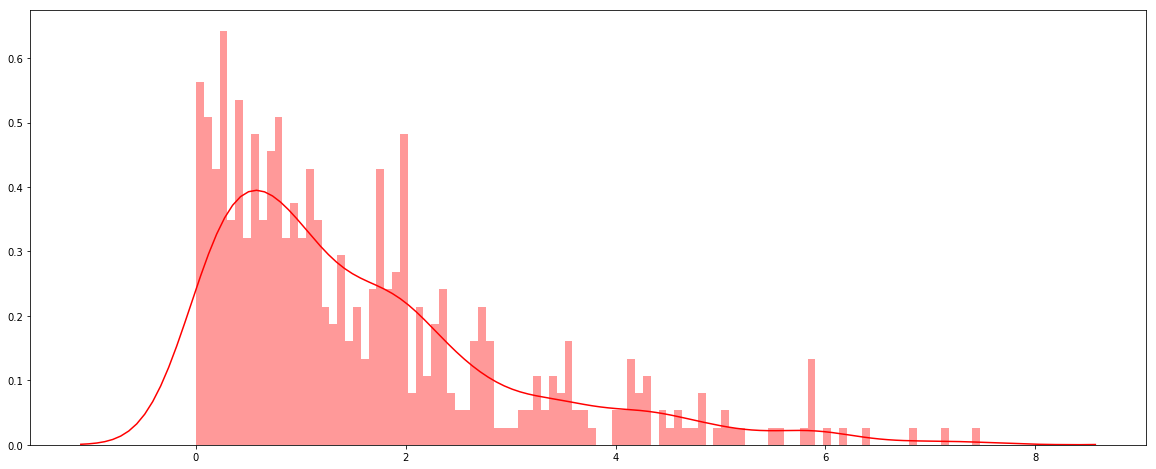

In [7]:
plt.figure(figsize=(20,8))
# deprecation error is an issue with displot implementation within Seaborn
sns.distplot(norm_zeta_value, bins=100, color='red')
plt.show()

In [24]:
# start becoming slow at 10^12
# function breaks at 10^
zeta(complex(real=1/2, imag=1e16))

mpc(real='0.40449487600845271', imag='3.6740342472886164')